In [21]:
import pandas as pd
import numpy as np
import scipy.stats as st
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

%matplotlib inline

In [31]:
master=pd.read_csv("data.csv")
master.shape

(4856, 9)

# Data Pre Processing

In [32]:
master1=master[master['kids']<98]
master1.shape
master2=master1[master1['educatn']<98]
master2.shape
master2['Kids_New']=np.where(master2['kids']<=2,"k1","k2")
master2['Married_New']=np.where(master2['married']=="married","m1","m2")
master2.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(4528, 11)

# Test1: T test to check whether people with age over 40 years earn more than the people with age less than 40 years

In [33]:
master3=master[master['earnings']>0]
master3.shape
master3['Ag_Cat']=np.where(master3['age']<40,"less than 40","over 40")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [34]:
m1=master3[master3['Ag_Cat']=='less than 40'].earnings
m2=master3[master3['Ag_Cat']=='over 40'].earnings

stat, p = ttest_ind(m1,m2)
p

2.5060497396711643e-06

In [35]:
np.mean(m1)

17901.47563261481

In [36]:
st.t.interval(0.95, len(m1)-1, loc=np.mean(m1), scale=st.sem(m1))

(17232.006932381861, 18570.944332847757)

In [37]:
np.mean(m2)

20401.56324110672

In [38]:
st.t.interval(0.95, len(m2)-1, loc=np.mean(m2), scale=st.sem(m2))

(19604.987493851746, 21198.138988361694)

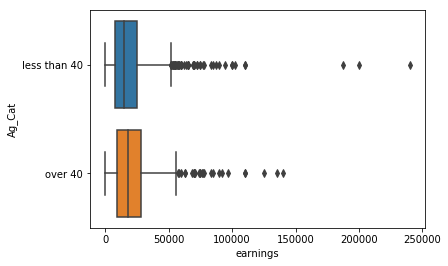

In [47]:
sns.boxplot( x=master3['earnings'], y=master3["Ag_Cat"] )
plt.show()

H0: Average earnings of a person with age less than 40 is equal to Average earning of a person with age greater than or equal to 40 years

H1:Average earnings of a person with age less than 40 is not equal to Average earning of a person with age greater than or equal to 40 years

Since the p value of the T test is less than 0.05 we can reject H0 with a 95% level of confidence

According to the sample Average earnings of a person with age less than 40 is equal to 17901 According to the sample Average earnings of a person with age greater than or equal to 40 is equal to 20401. Which shows that people with age over 40 years earns more than people with age less than 40

95% confidence interval for Average earnings(per year) of a person with age age greater than or equal to 40 years (17232.00693238186, 18570.944332847757)

95% confidence interval for Average earnings(per year) of a person with Low Educational Level (19604.987493851746, 21198.138988361694)



# Test2:  T test to check whether people with age over 40 years works more than the people with age less than 40 years

In [77]:
master3=master[master['hours']>0]
master3.shape
master3['Ag_Cat']=np.where(master3['age']<40,"less than 40","over 40")


C:\Users\Heshan Perera\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [78]:
m1=master3[master3['Ag_Cat']=='less than 40'].hours
m2=master3[master3['Ag_Cat']=='over 40'].hours

stat, p = ttest_ind(m1,m2)
p

2.8967779055610274e-05

In [79]:
np.mean(m1)

1593.8561419897244

In [80]:
st.t.interval(0.95, len(m1)-1, loc=np.mean(m1), scale=st.sem(m1))

(1562.4515770097912, 1625.2607069696576)

In [81]:
np.mean(m2)

1695.9606557377049

In [82]:
st.t.interval(0.95, len(m2)-1, loc=np.mean(m2), scale=st.sem(m2))

(1660.3527598459957, 1731.568551629414)

In [ ]:
sns.boxplot( x=master3['earnings'], y=master3["kidsNew"] )
plt.show()

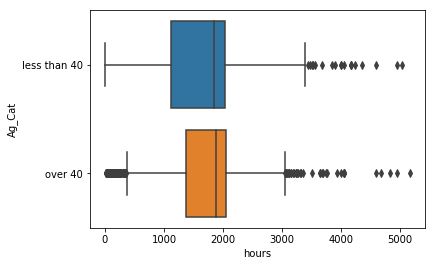

In [48]:
sns.boxplot( x=master3['hours'], y=master3["Ag_Cat"] )
plt.show()

H0: Average working hours(per year) of a person with age less than 40 is equal to Average working hours of a person with age greater than or equal to 40 years 

H1:Average working hours(per year) of a person with age less than 40 is not equal to Average working hours(per year) of a person with age greater than or equal to 40 years

Since the p value of the T test is less than 0.05 we can reject H0 with a 95% level of confidence

According to the sample Average working hours(per year) of a person with age less than 40 is equal to 1593 According to the sample Average working hours(per year) of a person with age greater than or equal to 40 is equal to 1695. Which shows that people with age over 40 years works more hours per year than people with age less than 40

95% confidence interval for Average working hours(per year) of a person with age less than 40 (1562.4515770097912, 1625.2607069696576)

95% confidence interval for Average working hours(per year) of a person person with age greater than or equal to 40 years (1660.3527598459957, 1731.568551629414)

# Test3: T test to check whether the earnings of people with high educational levels  are different  than  earnings of the people with low educational levels

In [50]:
master3=master[master['educatn']<98]
master4=master3[master3['earnings']>0]
master4.shape
master4['Ed_Cat']=np.where(master4['educatn']<14,"low","High")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [51]:
m1=master4[master4['Ed_Cat']=='low'].earnings
m2=master4[master4['Ed_Cat']=='High'].earnings

stat, p = ttest_ind(m1,m2)
p

7.7133311043297673e-95

In [52]:
np.mean(m1)

14901.589937666964

In [73]:
st.t.interval(0.95, len(m1)-1, loc=np.mean(m1), scale=st.sem(m1))

(14433.644954567146, 15369.534920766782)

In [74]:
np.mean(m2)

26087.509508716324

In [75]:
st.t.interval(0.95, len(m2)-1, loc=np.mean(m2), scale=st.sem(m2))

(24994.934095784818, 27180.08492164783)

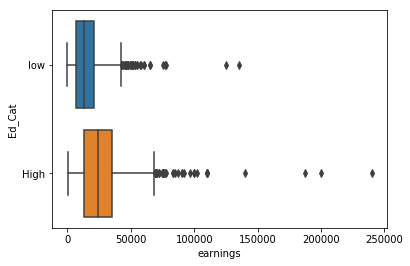

In [53]:
sns.boxplot( x=master4['earnings'], y=master4["Ed_Cat"] )
plt.show()

H0: Average earnings of a person with High Educational Level is equal to Average earning of a person with Low Educational Level

H1:Average earnings of a person with High Educational Level is not equal to Average earning of a person with Low Educational Level

Since the p value of the T test is less than 0.05 we can reject H0 with a 95% level of confidence

According to the sample Average earnings of a person High Educational Level(14 to 17) is equal to 26087 According to the sample Average earnings of a person with Low Educational Level(less than 14) is equal to 14901. Which shows that people with High Educational levels earns more than the people with low educational levels

95% confidence interval for Average earnings(per year) of a person with High Educational Level ((24994.934095784818, 27180.08492164783)

95% confidence interval for Average earnings(per year) of a person with Low Educational Level (14433.644954567146, 15369.534920766782)



# Test4: T test to check whether working hours of people with high educational levels  are different than the working hours of people with low educational levels

In [54]:
m1=master4[master4['Ed_Cat']=='low'].hours
m2=master4[master4['Ed_Cat']=='High'].hours

stat, p = ttest_ind(m1,m2)
p

0.094170555592575964

In [55]:
stats.describe(m1)

DescribeResult(nobs=2246, minmax=(6, 5160), mean=1620.3490650044523, variance=539175.06384545052, skewness=-0.24914196094497612, kurtosis=0.9774515488003894)

In [56]:
st.t.interval(0.95, len(m1)-1, loc=np.mean(m1), scale=st.sem(m1))

(1589.9652488287225, 1650.7328811801822)

In [57]:
stats.describe(m2)

DescribeResult(nobs=1262, minmax=(7, 4821), mean=1663.1584786053884, variance=508825.64496770728, skewness=-0.18024880550149047, kurtosis=0.7264489197730679)

In [58]:
st.t.interval(0.95, len(m2)-1, loc=np.mean(m2), scale=st.sem(m2))

(1623.7653967771334, 1702.5515604336433)

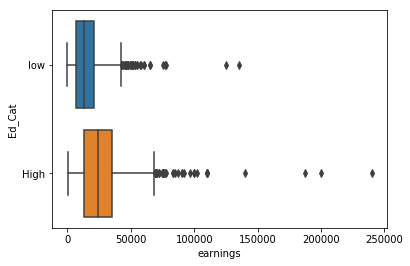

In [59]:
sns.boxplot( x=master4['earnings'], y=master4["Ed_Cat"] )
plt.show()

H0: Average working hours(per year) of a person with High Educational Level is equal to Average working hours of a person with Low Educational Level

H1:Average working hours(per year) of a person with High Educational Level is not equal to Average working hours(per year) of a person with Low Educational Level

Since the p value of the T test is not less than 0.05 we do not reject H0 with a 95% level of confidence

According to the sample Average working hours(per year) of a person with High Educational is equal to 1663 According to the sample Average working hours(per year) of a person with Low Educational is equal to 1620. This shows that there is not significant difference between working hours of a person with high educational level and a person with a low educational level.

95% confidence interval for Average working hours(per year) of a person with High Educational Level
(1623.7653967771334, 1702.5515604336433)

95% confidence interval for Average working hours(per year) of a person with Low Educational Level
(1589.9652488287225, 1650.7328811801822)



# Test5: Analysis the Earnings according to the number of kids 

In [22]:
data=pd.read_csv("data.csv")
data.shape
#Data Cleaning 
temp=data[data['kids']<98]
data=temp[temp['educatn']<98]
data.shape

(4528, 9)

Number of kids are segmented as the 
k1: Number of Kids are less than or equal 2 
k2: Number of kides are greater than 2 

In [9]:
data['kidsNew']=np.where(data['kids']<=2,'k1','k2')
x=data[(data['kidsNew']=='k1') & (data['earnings']>0) ].earnings
y=data[(data['kidsNew']=='k2') & (data['earnings']>0) ].earnings

stat, p = ttest_ind(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
#Average  earnings and confidence interval for the families greater than 2 kids 
print("Average of earnings for group k1",np.mean(y))
print(st.t.interval(0.95, len(y)-1, loc=np.mean(y), scale=st.sem(y)))

Average of earnings for group k1 14959.685891748004
(14238.234814396603, 15681.136969099405)


In [11]:
#Average  earnings and confidence interval for the families greater than 2 kids 
print("Average of earnings for group k1",np.mean(y))
print(st.t.interval(0.95, len(y)-1, loc=np.mean(y), scale=st.sem(y)))

Average of earnings for group k1 14959.685891748004
(14238.234814396603, 15681.136969099405)


Hypothesis Test 

H0: Average earnings for group k1
H1: Average earnings for group k2  

Decision : According to the 2 -sample t test it can be seen that p_value is less then 0.05. Therefore we reject h0 at 0.05 significance level 

Conclusion: Average earnings according to the 2 groups have significant difference 

95% confidence interval for Average earnings(per year) for group k1 (20208.801278639647, 21591.235599576477)
95% confidence interval for Average earnings(per year) other group k2 (14238.234814396603, 15681.136969099405)



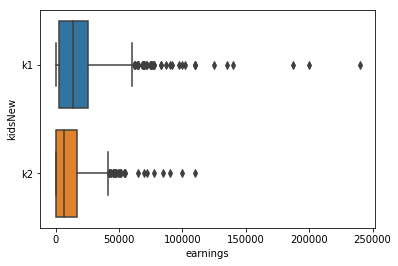

In [12]:
#Visualization of earnings  according to the 2 groups  
sns.boxplot( x=data['earnings'], y=data["kidsNew"] )
plt.show()

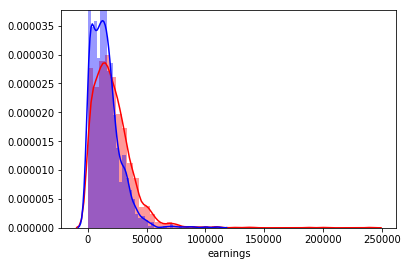

In [13]:
# Method 1: on the same Axis
sns.distplot( x , color="red", label="k1-earnings")
sns.distplot( y , color="blue", label="k2-earnings")

# Test6: Analysis of earnings according to the marriage

Number of kids are segmented as the 
m1: married People 
m2: All other people (not married)

In [14]:
data['marriedNew']=np.where(data['married']=='married','m1','m2')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [15]:
x1=data[(data['marriedNew']=='m1') & (data['earnings']>0) ].earnings
y1=data[(data['marriedNew']=='m2') & (data['earnings']>0) ].earnings

stat, p = ttest_ind(x1,y1)
print(p)

0.0275155381311


In [16]:
#Average  earnings and confidence interval for the families less than or equal 2 kids 
print("Average of earnings for group m1",np.mean(x1))
print(st.t.interval(0.95, len(x1)-1, loc=np.mean(x1), scale=st.sem(x1)))

Average of earnings for group m1 19389.036617262424
(18720.200515095428, 20057.872719429419)


In [17]:
#Average  earnings and confidence interval for the families less than or equal 2 kids 
print("Average of earnings for group m1",np.mean(y1))
print(st.t.interval(0.95, len(y1)-1, loc=np.mean(y1), scale=st.sem(y1)))

Average of earnings for group m1 18128.72017167382
(17268.555759225124, 18988.884584122516)


#Hypothesis Test 

H0: Average earnings for group m1
H1: Average earnings for group m2  

Decision : According to the 2 -sample t test it can be seen that p_value is less then 0.05. Therefore we reject h0 at 0.05 significance level 

Conclusion: Average earnings according to the 2 groups have significant difference 

95% confidence interval for Average earnings(per year) for group m1 (18720.200515095428, 20057.872719429419)
95% confidence interval for Average earnings(per year) other group m2 (17268.555759225124, 18988.884584122516)



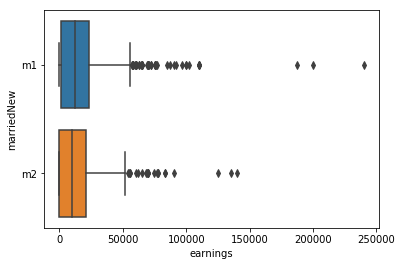

In [18]:
#Visualization of earnings  according to the 2 groups  
sns.boxplot( x=data['earnings'], y=data["marriedNew"] )
plt.show()

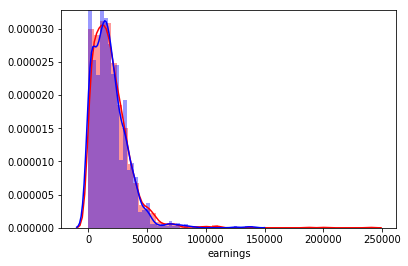

In [19]:
# Method 1: on the same Axis
sns.distplot( x1 , color="red", label="m1-earnings")
sns.distplot( y1 , color="blue", label="m2-earnings")

# Test7: Checking the correlation of the earnings and the number of hours 

In [ ]:
df = pd.read_csv('..\Dataset\dataEdited.csv', index_col = 'Seq No')
#df['H-L'] = df.High - df.Low

print(df.describe())

In [70]:
#data['hours'].corr(data['earnings'])
corr, p_value = pearsonr(data['earnings'],data['hours'])
print(corr)
print(p_value)

0.627261497688
0.0


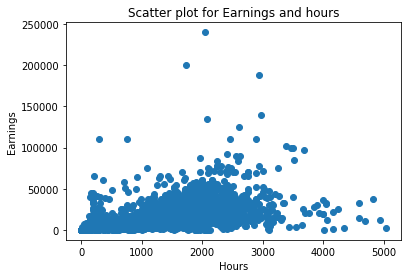

In [25]:
plt.scatter(data.hours, data.earnings)
plt.title('Scatter plot for Earnings and hours')
plt.xlabel('Hours')
plt.ylabel('Earnings')
plt.show()


h0:There is no correlation between earnings and the number of hours worked 
h1:There is correlation between earnings and the number of hours worked 

Decision : We reject h0 at 0.05 significance level sinice p_value<0.05. 

Conclusion: There is correlation between earnings and the number of hours worked 

Correlation between earnings and the nuber of hours worked is about 0.6. That is there is a high positive linear relationship between the two variables. 



# Test8: Checking the correlation of the earnings and the age 

In [65]:
data['age'].corr(data['earnings'])

corr, p_value = pearsonr(data['earnings'],data['age'])
print(corr)
print(p_value)

0.0924234967712
4.63946513113e-10


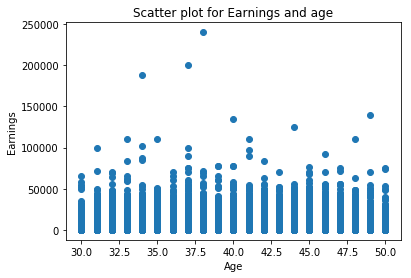

In [27]:
plt.scatter(data.age, data.earnings)
plt.title('Scatter plot for Earnings and age')
plt.xlabel('Age')
plt.ylabel('Earnings')
plt.show()


h0:There is no correlation between earnings and the age
h1:There is correlation between earnings and the age 

Decision : We reject h0 at 0.05 significance level sinice p_value<0.05. 

Conclusion: There is correlation between earnings and the age

But Correlation between earnings and the age is  about 0.1 That is there is very low linear relationship between the two variables. 

# Test9: Checking the association of the earnings and the Education

In [67]:
data['educatn'].corr(data['earnings'])

corr, p_value = pearsonr(data['earnings'],data['educatn'])
print(corr)
print(p_value)

0.379606002392
3.68674597911e-155


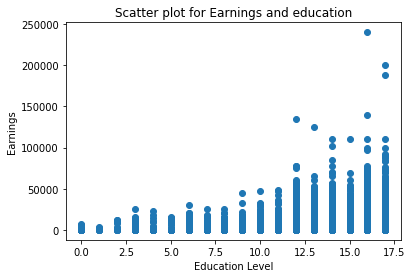

In [30]:
plt.scatter(data.educatn, data.earnings)
plt.title('Scatter plot for Earnings and education')
plt.xlabel('Education Level')
plt.ylabel('Earnings')
plt.show()


h0:There is no correlation between earnings and the education
h1:There is correlation between earnings and the education

Decision : We reject h0 at 0.05 significance level since p_value<0.05. 

Conclusion: There is correlation between earnings and the education

But Correlation between earnings and the age is  about 0.4 That is there moderate linear relationship between the two variables. 